In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

class GNNClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNNClassifier, self).__init__()
        torch.manual_seed(42)
        self.conv1 = GCNConv(input_dim, hidden_dim).to(device)
        self.conv2 = GCNConv(hidden_dim, output_dim).to(device)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

def visualize(h, color):
    h = h.cpu()
    z = TSNE(n_components=2).fit_transform(h.numpy())

    print("finish_tsne")
    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color[80000:].cpu(), cmap="Set2")
    plt.show()
    
# Define the device to be used (CPU or GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the dimensions of input and output
input_dim = 128  # Dimensionality of input features (x)
hidden_dim = 1024  # Dimensionality of hidden layer
output_dim = 40   # Number of classes in classification task
num_epochs = 300

# Create the model
model = GNNClassifier(input_dim, hidden_dim, output_dim).to(device)

# Define the loss function (criterion) and optimizer
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

dataset = torch.load('data/hw3/processed/data.pt')

# Assuming you have the data tensors in the following variables
x = dataset.x.to(device)
edge_index = dataset.edge_index.to(device)
y = dataset.y.to(device)
train_mask = dataset.train_mask.to(device)
val_mask = dataset.val_mask.to(device)

# Set the model in training mode
model.train()

losses = []
# Training loop
for epoch in range(num_epochs):
    optimizer.zero_grad()
    output = model(x, edge_index)
    loss = criterion(output[train_mask], y[train_mask].squeeze())
    loss.backward()
    optimizer.step()

#     # # Validation
#     # model.eval()
#     # with torch.no_grad():
#     #     val_output = model(x, edge_index)[val_mask]
#     #     val_loss = criterion(val_output, y[val_mask].squeeze())
#     losses.append(loss.item())
#     print(f"Epoch: {epoch}, Training Loss: {loss.item()}")

# Assuming you have trained your model and obtained the test predictions
model.eval()
with torch.no_grad():
    test_output = model(x, edge_index)[val_mask]
    _, predicted_labels = test_output.max(dim=1)


# Convert the predicted labels and ground truth labels to CPU tensors if necessary
predicted_labels = predicted_labels.cpu()
ground_truth_labels = y[val_mask].squeeze().cpu()

# Calculate the accuracy
correct = (predicted_labels == ground_truth_labels).sum().item()
total = ground_truth_labels.size(0)
accuracy = correct / total * 100

print(f"Accuracy: {accuracy:.2f}%")

#visualize(test_output, color=y)
# a = 0

Accuracy: 60.02%


In [4]:
len(losses)

129

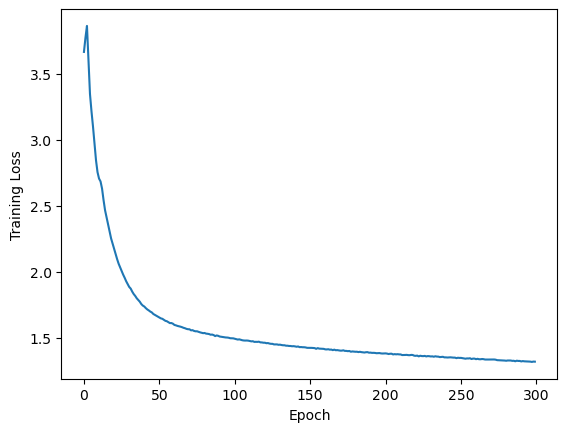

In [ ]:
import matplotlib.pyplot as plt
import pickle

# # Load the model from a file
# with open('model.pkl', 'rb') as file:
#     model = pickle.load(file)
    
# Get the training loss
training_loss = losses

# Get the number of epochs
epochs = len(training_loss)

# Create a plot
plt.plot(training_loss)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.show()


In [7]:
years = dataset.node_year.squeeze()

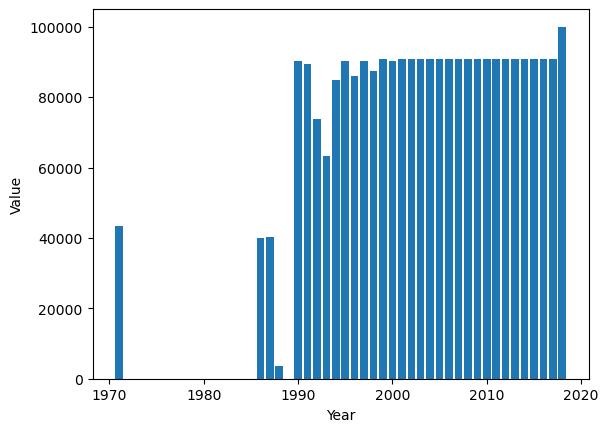

In [11]:
# Plot the tensor
import numpy as np
x = np.arange(len(years))
plt.bar(years,x )
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

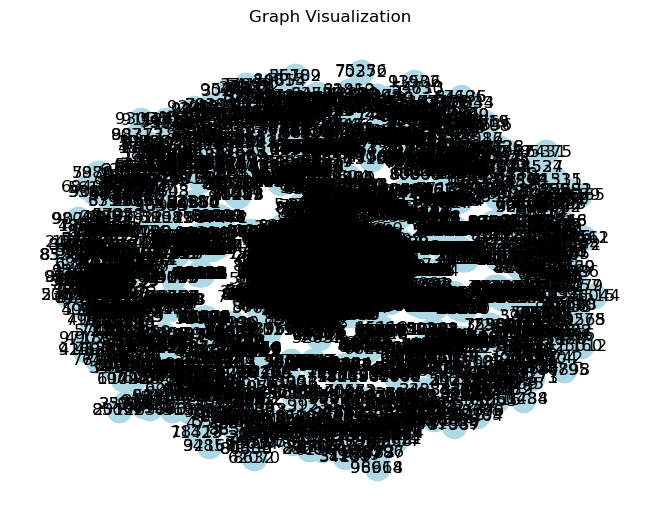

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming edge_index is the edge index of your dataset
# Create a graph from the edge_index
G = nx.Graph()
G.add_edges_from(edge_index.t().tolist())

# Visualize the graph
pos = nx.spring_layout(G)  # Layout algorithm for node positions
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Graph Visualization")
plt.show()


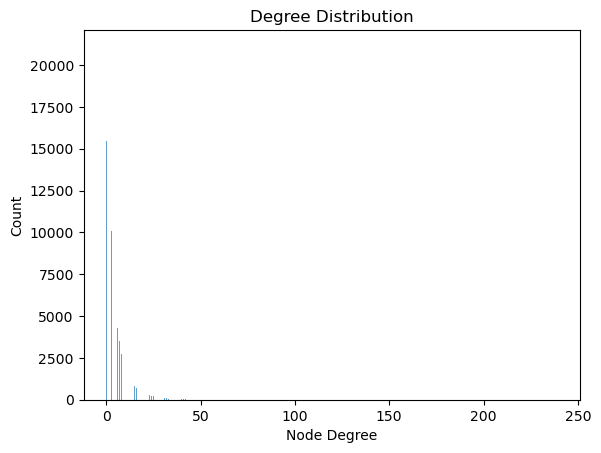

In [3]:
import numpy as np

# Assuming edge_index is the edge index of your dataset
# Compute the degree of each node
degrees = np.bincount(edge_index[0].cpu())

# Plot the degree distribution
plt.hist(degrees, bins='auto', alpha=0.7)
plt.xlabel("Node Degree")
plt.ylabel("Count")
plt.title("Degree Distribution")
plt.show()


In [ ]:
# Assuming edge_index is the edge index of your dataset
# Create a graph from the edge_index
G = nx.Graph()
G.add_edges_from(edge_index.t().tolist())

# Find connected components
components = nx.connected_components(G)

# Plot each connected component separately
for component in components:
    subgraph = G.subgraph(component)
    pos = nx.spring_layout(subgraph)  # Layout algorithm for node positions
    nx.draw(subgraph, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    plt.title("Connected Component")
    plt.show()
